In [33]:
import os
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

import tensorflow as tf

from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils, to_categorical
 
from keras.datasets import reuters

In [34]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print("train_data ", train_data.shape)
print("train_labels ", train_labels.shape)

print("test_data ", test_data.shape)
print("test_labels ", test_labels.shape)

train_data  (8982,)
train_labels  (8982,)
test_data  (2246,)
test_labels  (2246,)


In [38]:
# Reverse dictionary to see words instead of integers

word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '-') for i in
train_data[0]])

print(decoded_newswire)
print(train_labels[0])

- - - said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
3


In [39]:
# VECTORIZE function

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [41]:
# Vectorize and Normalize train and test to tensors with 10k columns

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


print("x_train ", x_train.shape)
print("x_test ", x_test.shape)

x_train  (8982, 10000)
x_test  (2246, 10000)


In [42]:
# ONE HOT ENCODER of the labels

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

print("one_hot_train_labels ", one_hot_train_labels.shape)
print("one_hot_test_labels ", one_hot_test_labels.shape)


one_hot_train_labels  (8982, 46)
one_hot_test_labels  (2246, 46)


In [43]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

print("x_val ", x_val.shape)
print("y_val ", y_val.shape)

print("partial_x_train ", partial_x_train.shape)
print("partial_y_train ", partial_y_train.shape)

x_val  (1000, 10000)
y_val  (1000, 46)
partial_x_train  (7982, 10000)
partial_y_train  (7982, 46)


In [44]:
# MODEL

model = models.Sequential()
model.add(layers.Dense(256, kernel_regularizer=regularizers.l1(0.001), activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, kernel_regularizer=regularizers.l1(0.001), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation='softmax'))

# FIT / TRAIN model

NumEpochs = 20
BatchSize = 512

model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=NumEpochs, batch_size=BatchSize, validation_data=(x_val, y_val))

results = model.evaluate(x_val, y_val)
print("_"*100)
print("Test Loss and Accuracy")
print("results ", results)

history_dict = history.history
history_dict.keys()

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 7s 910us/step - loss: 15.6790 - acc: 0.4598 - val_loss: 6.1721 - val_acc: 0.5620
Epoch 2/20
7982/7982 [==============================] - 4s 536us/step - loss: 5.7370 - acc: 0.5594 - val_loss: 5.1666 - val_acc: 0.6570
Epoch 3/20
7982/7982 [==============================] - 4s 526us/step - loss: 4.9559 - acc: 0.6055 - val_loss: 4.5891 - val_acc: 0.6160
Epoch 4/20
7982/7982 [==============================] - 5s 574us/step - loss: 4.4332 - acc: 0.6234 - val_loss: 4.1169 - val_acc: 0.6720
Epoch 5/20
7982/7982 [==============================] - 5s 648us/step - loss: 4.0104 - acc: 0.6462 - val_loss: 3.7856 - val_acc: 0.6620
Epoch 6/20
7982/7982 [==============================] - 4s 552us/step - loss: 3.7239 - acc: 0.6506 - val_loss: 3.5171 - val_acc: 0.6680
Epoch 7/20
7982/7982 [==============================] - 4s 535us/step - loss: 3.5175 - acc: 0.6625 - val_loss: 3.3800 - val_acc: 0.6910

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

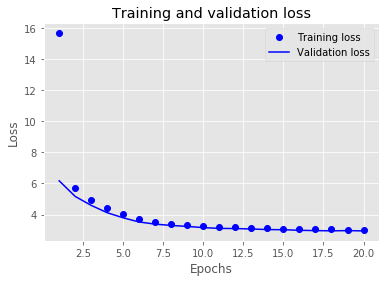

In [45]:
# VALIDATION LOSS curves

plt.clf()
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

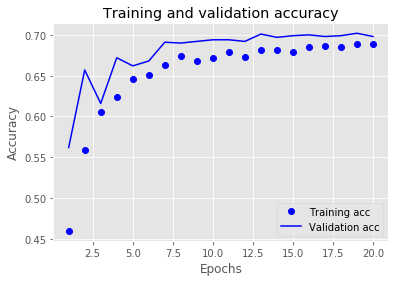

In [46]:
## VALIDATION ACCURACY curves

plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [47]:
# Retrain from scratch for # of epochs per LEARNING curves above - and evaluate with TEST (which was set aside above)

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(partial_x_train,partial_y_train,epochs= 20, batch_size=512,
validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

print("_"*100)
print(results)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 376us/step - loss: 3.1684 - acc: 0.3143 - val_loss: 2.0974 - val_acc: 0.5480
Epoch 2/20
7982/7982 [==============================] - 2s 290us/step - loss: 2.0950 - acc: 0.5408 - val_loss: 1.5953 - val_acc: 0.6210
Epoch 3/20
7982/7982 [==============================] - 2s 294us/step - loss: 1.7229 - acc: 0.6020 - val_loss: 1.4164 - val_acc: 0.6720
Epoch 4/20
7982/7982 [==============================] - 2s 278us/step - loss: 1.5246 - acc: 0.6407 - val_loss: 1.3004 - val_acc: 0.6990
Epoch 5/20
7982/7982 [==============================] - 2s 292us/step - loss: 1.4026 - acc: 0.6700 - val_loss: 1.2388 - val_acc: 0.7100
Epoch 6/20
7982/7982 [==============================] - 2s 275us/step - loss: 1.2911 - acc: 0.6902 - val_loss: 1.1937 - val_acc: 0.7160
Epoch 7/20
7982/7982 [==============================] - 2s 265us/step - loss: 1.2126 - acc: 0.7096 - val_loss: 1.1469 - val_acc: 0.7370


In [48]:
# DATA decoding

decoded_test_data_row = ' '.join([reverse_word_index.get(i - 3, '-') for i in
test_data[500]])

print(decoded_test_data_row)

print(test_labels[500])


- shr profit three cts vs profit one ct net profit 129 082 vs profit 36 099 revs 3 864 187 vs 1 875 919 nine mths shr loss six cts vs profit two cts net loss 303 581 vs profit 110 311 revs 9 517 242 vs 5 248 105 note prior qtr and nine mth figures include - of 15 000 dlrs and 48 000 dlrs respectively reuter 3
3


In [49]:
# Predict

predictions = model.predict(x_test)

# The coefficients in this vector sum to 1:
print(np.sum(predictions[500]))

# The largest entry is the predicted class — the class with the highest probability:
print(np.argmax(predictions[500]))

(46,)
0.9999997
3
